# **json file upload kaggle **

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yaseenqazi","key":"b67afea0c377e35f8b7b2ea632bf95be"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


# **Downlload Direct kaggle data **

In [3]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset -p /content


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 814MB/s]


# **Unzip folder **

In [4]:
!unzip -o fake-and-real-news-dataset.zip -d dataset


Archive:  fake-and-real-news-dataset.zip
  inflating: dataset/Fake.csv        
  inflating: dataset/True.csv        


# **Data Set Check**

In [5]:
import pandas as pd
df_fake = pd.read_csv('/content/dataset/Fake.csv')
df_true = pd.read_csv('/content/dataset/True.csv')
df_fake.head()
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# **Libraries all**

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
import string

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Import stopwords, tokenizer, lemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
df_fake = pd.read_csv('/content/dataset/Fake.csv')
df_true = pd.read_csv('/content/dataset/True.csv')
df_fake['label'] = 0   # Fake Show it is a simple way to indetify= 0
df_true['label'] = 1   # True Show it is a simple way to indetify = 1
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# **Create New Folder Content and Store title and text**

In [8]:
df['content'] = df['title'].fillna('') + " " + df['text'].fillna('')


# **Drop duplicates & missing**

In [9]:
df.drop_duplicates(subset='content', inplace=True)
df.dropna(subset=['content', 'label'], inplace=True)

# **Text Normalization**

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)
# Apply preprocessing
df['clean_text'] = df['content'].apply(preprocess_text)

# Check result
print(df[['content', 'clean_text', 'label']].head())
print("Final Shape:", df.shape)

                                             content  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                          clean_text  label  
0  donald trump sends embarrassing new year eve m...      0  
1  drunk bragging trump staffer started russian c...      0  
2  sheriff david clarke becomes internet joke thr...      0  
3  trump obsessed even obamas name coded website ...      0  
4  pope francis called donald trump christmas spe...      0  
Final Shape: (39105, 7)


## **Exploratory Data Analysis (EDA)**

# **Fake vs Real Class Distribution**

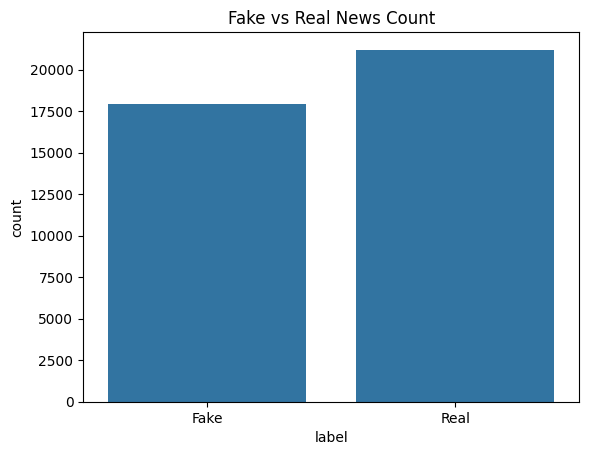

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Fake vs Real News Count')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()


# **Article Length Distribution**



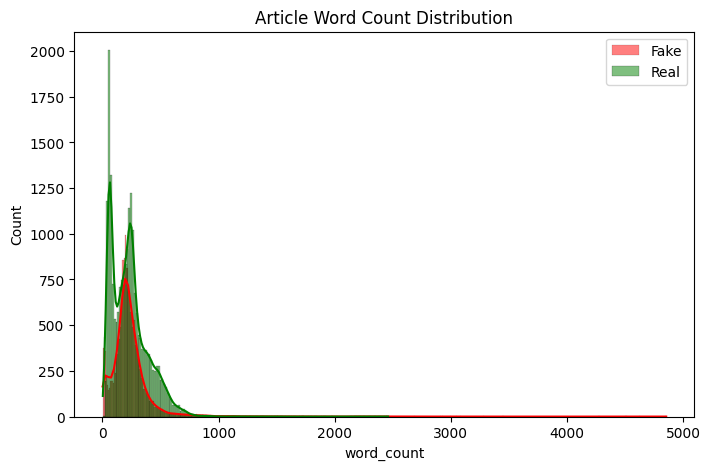

In [12]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df[df['label']==0]['word_count'], color='red', label='Fake', kde=True)
sns.histplot(df[df['label']==1]['word_count'], color='green', label='Real', kde=True)
plt.legend()
plt.title('Article Word Count Distribution')
plt.show()


# **Most Common Words**

In [13]:
from collections import Counter

fake_words = " ".join(df[df['label']==0]['clean_text']).split()
real_words = " ".join(df[df['label']==1]['clean_text']).split()

fake_top = Counter(fake_words).most_common(10)
real_top = Counter(real_words).most_common(10)

print("Top 10 Fake Words:", fake_top)
print("Top 10 Real Words:", real_top)


Top 10 Fake Words: [('trump', 71461), ('said', 23068), ('people', 21151), ('president', 20437), ('one', 18735), ('would', 18346), ('state', 16328), ('donald', 15633), ('u', 15538), ('republican', 14860)]
Top 10 Real Words: [('said', 97822), ('trump', 59104), ('u', 44662), ('state', 36750), ('would', 31382), ('reuters', 28150), ('president', 27183), ('republican', 22932), ('government', 19578), ('year', 19252)]


# **Feature Engineering**

# **TF-IDF (Recommended)**

In [14]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)


TF-IDF Train Shape: (31284, 5000)
TF-IDF Test Shape: (7821, 5000)


# **Model Training**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----- Train-Test Split + TF-IDF -----
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# **Logistic Regression**

---- Logistic Regression ----
Accuracy: 0.9861910241657077

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3582
           1       0.98      0.99      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



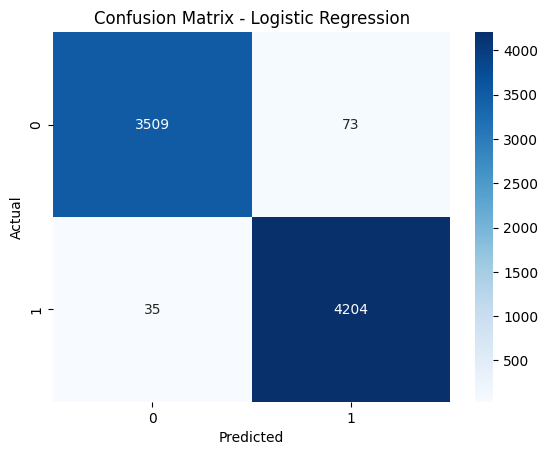

In [16]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_tfidf, y_train)

y_pred_lr = log_reg.predict(X_test_tfidf)
print("---- Logistic Regression ----")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **SVM Model Training**

---- SVM ----
Accuracy: 0.9937348165196267

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3582
           1       0.99      1.00      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



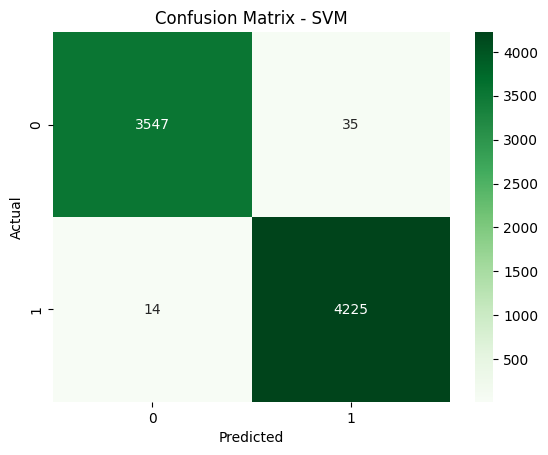

In [17]:
svm_clf = LinearSVC()
svm_clf.fit(X_train_tfidf, y_train)

y_pred_svm = svm_clf.predict(X_test_tfidf)
print("---- SVM ----")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Logistic Regression ROC Curve**

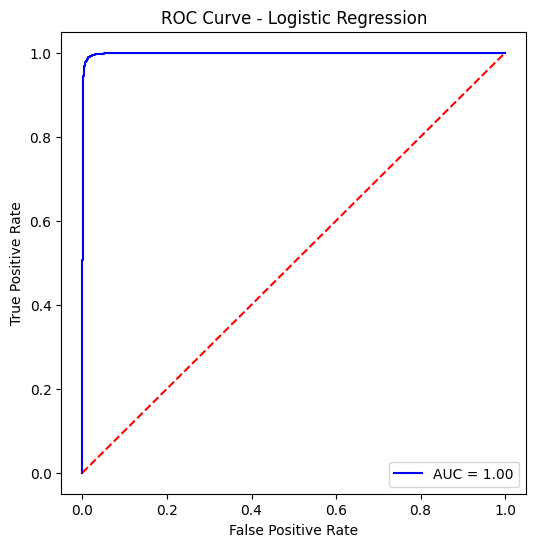

In [18]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression ROC
y_prob_lr = log_reg.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f"AUC = {roc_auc_lr:.2f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()
